## Install & Import

In [1]:
import cv2, numpy as np
import matplotlib.pyplot as plt

## Load Sample FOR FLIP Image

In [2]:
img = cv2.imread("image.jpeg")

In [3]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

(np.float64(-0.5), np.float64(291.5), np.float64(123.5), np.float64(-0.5))

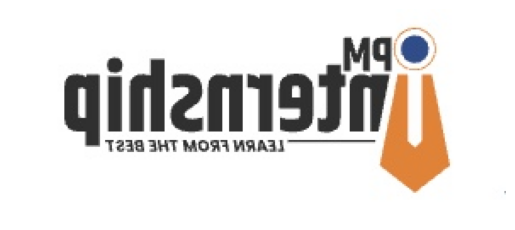

In [4]:
flip = cv2.flip(img, 1)
plt.imshow(cv2.cvtColor(flip, cv2.COLOR_BGR2RGB)); plt.axis('off')

## Gaussian Blur

In [6]:
img = cv2.imread("Flowers.jpg")

(np.float64(-0.5), np.float64(611.5), np.float64(343.5), np.float64(-0.5))

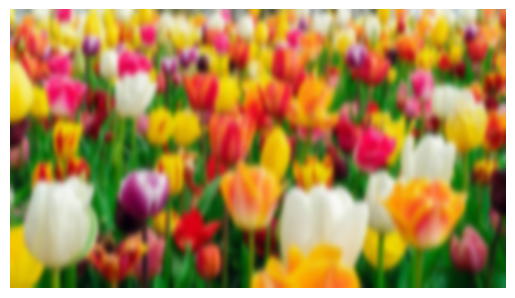

In [7]:
blur = cv2.GaussianBlur(img, (15,25), 0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)); plt.axis('off')

## 🧠 Morphological Operations (Erode, Dilate, Open, Close)

- Morphology = modifying shapes in an image.

- It is mostly applied on binary or grayscale images to clean noise, fix gaps, remove small pixels, make shapes solid.

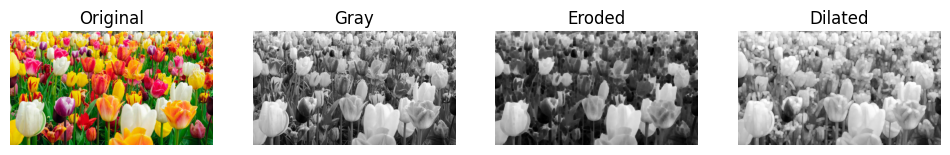

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)   # 5x5 square kernel
# ---- Morphological Operations ----
eroded = cv2.erode(gray, kernel, iterations=1)
dilated = cv2.dilate(gray, kernel, iterations=1)

# ---- Display ----
plt.figure(figsize=(12,4))
titles = ['Original', 'Gray', 'Eroded', 'Dilated']
images = [img, gray, eroded, dilated]

for i,(image,title) in enumerate(zip(images,titles)):
    plt.subplot(1,4,i+1)
    try: plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    except: plt.imshow(image, cmap='gray')
    plt.title(title); plt.axis('off')

| Operation    | Effect                             | Use-case                       |
| ------------ | ---------------------------------- | ------------------------------ |
| **Erosion**  | Removes white pixels, thins shapes | Removes noise, shrinks objects |
| **Dilation** | Adds white pixels, thickens shapes | Expands boundaries, fills gaps |

In [9]:
opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)   # erosion → dilation
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)  # dilation → erosion
closing

array([[239, 239, 239, ..., 183, 183, 183],
       [235, 235, 235, ..., 183, 183, 183],
       [234, 234, 234, ..., 166, 166, 166],
       ...,
       [161, 160, 160, ...,  96,  96,  96],
       [161, 160, 160, ...,  96,  96,  96],
       [161, 160, 160, ...,  96,  96,  96]], shape=(344, 612), dtype=uint8)

## 3️⃣ Opening = Erosion ➝ Dilation

- ✔ Removes small noise ❌ BUT retains object shape

- → Best when an image has dots/noise that must be removed

## 4️⃣ Closing = Dilation ➝ Erosion

- ✔ Fills small holes inside object ✔ Fixes broken boundaries

- → Best when shapes are broken, have gaps or cuts

## Canny Edge Detection

(np.float64(-0.5), np.float64(611.5), np.float64(343.5), np.float64(-0.5))

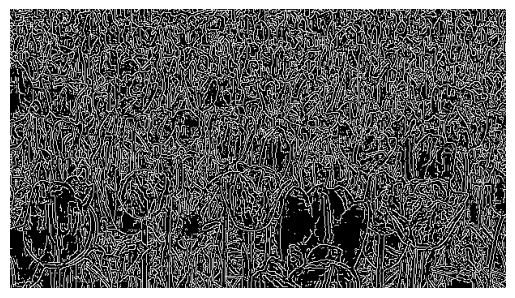

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 20, 20) # TRY DECREASE AND INCREASING
plt.imshow(edges, cmap='gray'); plt.axis('off')


(np.float64(-0.5), np.float64(611.5), np.float64(343.5), np.float64(-0.5))

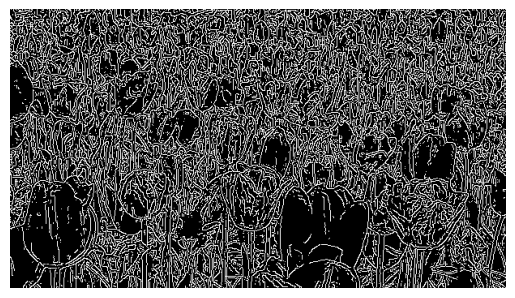

In [12]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 45, 45) # TRY DECREASE AND INCREASING
plt.imshow(edges, cmap='gray'); plt.axis('off')

## Hough Line Detection

(np.float64(-0.5), np.float64(611.5), np.float64(343.5), np.float64(-0.5))

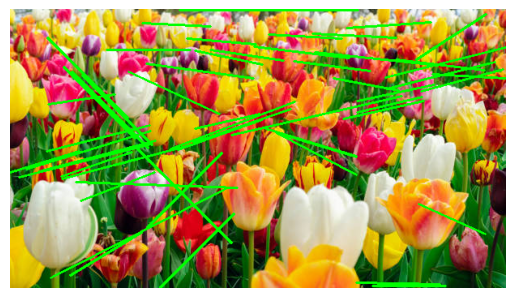

In [15]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=120, minLineLength=80, maxLineGap=5)
out = img.copy()
if lines is not None:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(out, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.axis('off')

## THRESHOLD 

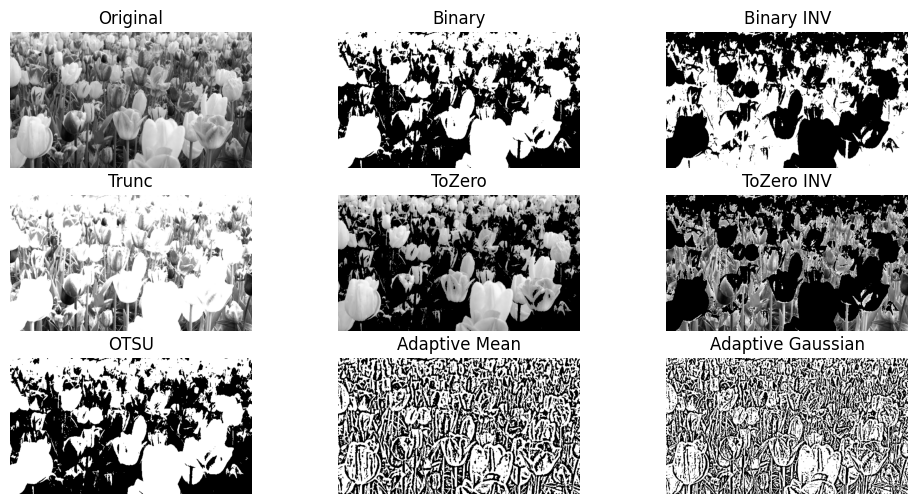

In [18]:
import cv2
import matplotlib.pyplot as plt

# Load image (grayscale recommended)

img = cv2.imread("Flowers.jpg",0)

# ---- Basic Thresholding ----
ret,th_binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret,th_inv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret,th_trunc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret,th_tozero = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret,th_tozero_inv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

# ---- OTSU (auto threshold selection) ----
ret,th_otsu = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ---- Adaptive Thresholding ----
th_adapt_mean = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

th_adapt_gauss = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# ---- Display Results ----
titles = [
    "Original", "Binary", "Binary INV", "Trunc", "ToZero", "ToZero INV",
    "OTSU", "Adaptive Mean", "Adaptive Gaussian"
]
images = [
    img, th_binary, th_inv, th_trunc, th_tozero, th_tozero_inv,
    th_otsu, th_adapt_mean, th_adapt_gauss
]

plt.figure(figsize=(12,6))
for i in range(len(images)):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()